# HR Analytics and Clustering<a class="anchor" id="top-bullet"></a>

<img src="images/Overview1.png" alt="Overview1" />

----

Victor Barros e S. dos Reis
Aug, 2024

### Discovery -> Insights -> Actions -> Outcomes

## Business Problem
- [Kaggle Dataset](https://www.kaggle.com/datasets/anshika2301/hr-analytics-dataset)
- A HR department from a big company has hired us to help them understand their employee profiles from a dataset of the employee board with data from all throughout 2023 and determine if there are issues negatively affecting the turnover rates. They would like to know if there are certain groups of employees that may have higher propensity to attrition, understand their common attributes, and finally come up with solutions that can be implemented in order to reduce turnover rates.


## Goals
- Our main goals are:
    - To determine if the Attrition/Turnover rates are indeed abnormal and if there are patterns for it
    - Identify possible causes that explain abnormal Attrition/Turnover rates by raising hypothesis
    - Accept/refute the hypothesis by analysing data correlation and the business rules
    - Classify the employees in different groups/clusters in order to suggest customized initiatives for each of them
- We are analysing the *'HR_Analytics.csv'* dataset
- And by using data analysis techniques such as correlation, regression and different plots
- We intend to effectively categorize our employees in groups with similar characteristics (**features**) and find out which of them are possibly more related with high Attrition/Turnover rates (our **target**)
- Data will be presented in a PowerBI report, together with the findings and recommendations


## Steps
- Load Data
- Describe the Data
- Pre-Processing: Data Cleaning, EDA and Feature Engineering
- Train-Test Split
- ML Model Building
- Model Performance
- Model Deployment
- Conclusion


## Table of Contents:
* [Business Problem](#first-bullet)
* [Data Loading](#second-bullet)
* [Data Cleaning](#third-bullet)
* [EDA](#fourth-bullet)
* [Feature Engineering](#fifth-bullet)
* [Choosing ML models](#sixth-bullet)
* [Results Analysis](#ninth-bullet)

---

# Business Problem<a class="anchor" id="first-bullet"></a>
- The HR department is almost sure that their attrition rates can be explained by a few reasons that some groups of employees may have in common, but they would like a specialized data consultant to perform this analysis and help them pinpoint a few initiatives to improve their overall scenario and employee well-being

## Understanding the business rules
- Employee Well-being is a multi-dimentional aspect that is affected by several factors/pilars, including: career satisfaction, healthy relationships, emotional stability, financial security, physical health, only to name a few.
- Some factors such as a high overtime working schedule, advanced age and receival of attractive job offers, for example, may explain a tendency to leave the company.

----

# Data Loading<a class="anchor" id="second-bullet"></a>
- All needed data will be loaded from the 'HR_Analytics.csv' dataset, from Kaggle
- A Mindmap for the features will be made in order to better understand what may be related to the Attrition/Turnover

### Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [3]:
# configurations and lib settings
pd.options.display.max_columns #20
pd.set_option('display.max_columns', None)
pio.renderers.default = 'notebook'

### Load Data

In [5]:
filepath=r''

In [6]:
df = pd.read_csv(filepath+'\HR_Analytics.csv')
df.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,405,3,Male,54,3,1,Laboratory Technician,3,Single,1420,Upto 5k,25233,1,Y,No,13,3,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,1,411,4,Female,69,2,1,Sales Representative,3,Single,1200,Upto 5k,9724,1,Y,No,12,3,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,614,2,Male,69,3,1,Sales Representative,2,Single,1878,Upto 5k,8059,1,Y,Yes,14,3,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1,1012,2,Male,73,3,1,Research Scientist,4,Single,1051,Upto 5k,13493,1,Y,No,15,3,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,1,1156,3,Male,80,3,1,Laboratory Technician,3,Single,1904,Upto 5k,13556,1,Y,No,12,3,4,80,0,0,0,3,0,0,0,0.0


In [7]:
df.columns

Index(['EmpID', 'Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### Data Description

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

In [9]:
# Describe our data for basic statistics
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1480.000000,1480.000000,1480.000000,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1423.000000
mean,36.917568,801.384459,9.220270,2.910811,1.0,1031.860811,2.724324,65.845270,2.729730,2.064865,2.725000,6504.985811,14298.460811,2.687162,15.210135,3.153378,2.708784,80.0,0.791892,11.281757,2.797973,2.760811,7.009459,4.228378,2.182432,4.118060
std,9.128559,403.126988,8.131201,1.023796,0.0,605.955046,1.092579,20.328266,0.713007,1.105574,1.104137,4700.261400,7112.056802,2.494098,3.655338,0.360474,1.081995,0.0,0.850527,7.770870,1.288791,0.707024,6.117945,3.616020,3.219357,3.555484
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,493.750000,2.000000,48.000000,2.000000,1.000000,2.000000,2922.250000,8051.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,800.000000,7.000000,3.000000,1.0,1027.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4933.000000,14220.000000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1568.250000,4.000000,83.000000,3.000000,3.000000,4.000000,8383.750000,20460.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Data Cleaning<a class="anchor" id="third-bullet"></a>

### Missing Data

In [ ]:
df.isna().sum()

We notice there are 57 rows in which the feature 'YearsWithCurrManager' is empty.

In [10]:
# check rows in which there are NaN values
len(df[df['YearsWithCurrManager'].isna()])

57

In [11]:
len(df[df['YearsWithCurrManager'].isna()]) / len(df)

0.038513513513513516

Here we could have two options: either go with the analysis without those rows where 'YearsWithCurrManager' are NaN or not consider this column at all in the analysis/model. I choose at first to go without those rows since they represent only 3.8% of our data and should not affect as much the analysis overall.

In [12]:
# dropping rows with NaN
df.dropna(subset=['YearsWithCurrManager'], inplace=True)
len(df)

1423

### Duplicated data

In [13]:
df.duplicated().sum()

7

In [14]:
# there are duplicated rows, and that makes no sense for employee data, so we promptly delete them
df=df.drop_duplicates(keep='first')

### Delete columns that are not relevant

In [15]:
# we shall remove data that are not relevant/helpful to our analysis, such as EmployeeNumber and StandardHours, 
# or columns that are redundant
df['StandardHours'].unique()

df.drop(['EmpID', 'EmployeeNumber', 'StandardHours', 'EmployeeCount', 'AgeGroup', 'Over18'], axis=1, inplace=True)

### Outliers

In [ ]:
# I'll check for outliers only in the columns they might apply (financial or time-related)
for col in ['DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate']:
    fig = px.box(df, x=col)
    fig.update_layout(title=f'Boxplot for {col}', yaxis_title=col)
    fig.show()

<img src="images/box1.png" alt="box1" />

In [16]:
# the ouliers are noticed only in MonthlyIncome. If we check the JobRoles for them we notice they're managers and research 
# directors, which justify the high income

df[df['MonthlyIncome']>=16555].JobRole.unique()

array(['Manager', 'Research Director'], dtype=object)

Since we intend to group the employees in different clusters, it makes no sense to remove the outliers as of now, since they might cause an important influence on the grouping algorithm and they should be noticed.

### Mindmap
According to our data and some research on the subject, is it safe to assume that factors that may affect Attrition/Turnover rate can be categorized into **External** factors (family-related, personal life or things that happen outside the company) or **Internal** factors (everything job and function related, as well as salary and interpersonal relationship), resulting in the following mindmap:

<img src="images/Mindmap.png" alt="Alternative text" />

### Initial Hypothesis
Here we can formulate a few hypothesis based on the mindmap and on the business inputs, and have them tested in order to both have a better understanding of the data as well as find interesting relationships between features. Let's suppose the initial hypothesis that were proposed are the following:

1. The higher the 'Age', the more propension of Attrition due to retirement or because companies seek to refresh their workforce with younger individuals
2. The furthest employees with lower compensations are located from work, the more likely they are to leave the company.
3. Job satisfaction is related (same orientation) to job involvement and when both are low, the higher the Attrition
4. Employees that accumulate lots of years since last promotion and are from the lowest job levels have higher Attrition
5. Education field has little or no relation to Attrition at all
6. Poor Work-Life Balance and frequent OverTime increase employee Attrition

# EDA<a class="anchor" id="fourth-bullet"></a>
In the Exploratory Data Analysis step, we will first assess our initial hypothesis for a more structured approach.

In [17]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000
mean,36.924435,803.329802,9.238701,2.907486,2.725989,65.989407,2.726695,2.069209,2.728814,6516.679379,14319.355932,2.711158,15.199153,3.151130,2.704802,0.799435,11.298729,2.802260,2.762712,7.037429,4.254944,2.213277,4.117232
std,9.135606,404.133280,8.122617,1.024395,1.090169,20.396197,0.711953,1.108023,1.099266,4723.565527,7112.986512,2.507778,3.638219,0.358302,1.080704,0.851952,7.825239,1.288885,0.709487,6.151044,3.636385,3.249310,3.559344
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2097.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2922.250000,8057.500000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,804.500000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4938.500000,14288.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1159.000000,14.000000,4.000000,4.000000,84.000000,3.000000,3.000000,4.000000,8380.250000,20440.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


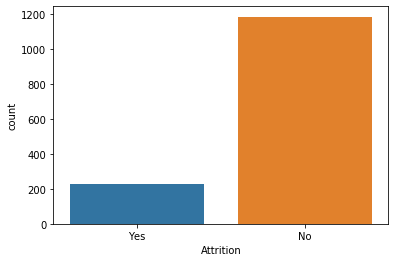

In [18]:
# if we count the employees with and without a positive Attrition, we can see the following distribution.
#'Yes' labels represent about 15% of the total rows
sns.countplot(data=df, x='Attrition')

### Testing the Hypothesis
**1. The higher the 'Age', the more propension of Attrition due to retirement or because companies seek to refresh their workforce with younger individuals**


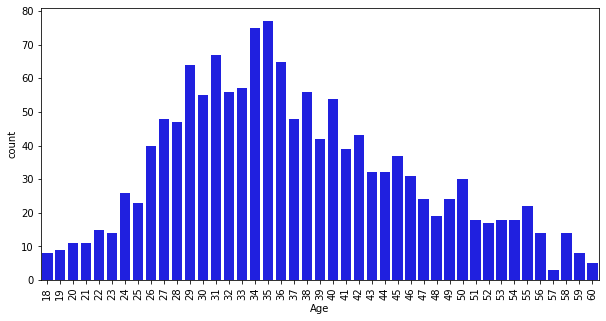

In [19]:
# first we shall see the distribution of employee by age
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df, x='Age', color='blue')
ax.tick_params(axis='x', rotation=90)

Then, since the age distribution is not uniform, and there are many distinct values, it makes sense to to group those ages into ranges (bins) by using a method called qcut and then calculate an *Attrition Rate* for each of those ranges by dividing the sum of Attritions = 'Yes' by the amount of employees in each range.

In [20]:
n_bins = 5
df['AgeGroup'] = pd.qcut(df['Age'], q=n_bins, labels=['18-29', '30-34', '35-38', '39-45', '46-60'])
#pd.qcut(df['Age'], q=n_bins).unique()

print(df['AgeGroup'].value_counts())

18-29    316
30-34    310
39-45    279
46-60    265
35-38    246
Name: AgeGroup, dtype: int64


In [21]:
# calculating the attrition rate
age_group_attrition = df[df['Attrition'] == 'Yes'].groupby('AgeGroup')['Attrition'].count() / df.groupby('AgeGroup')['Attrition'].count() * 100
age_group_attrition

AgeGroup
18-29    28.164557
30-34    17.741935
35-38     8.943089
39-45    10.394265
46-60    12.830189
Name: Attrition, dtype: float64

In [ ]:
# plotting the results
plt.figure(figsize=(10,5))
fig = px.bar(age_group_attrition, x=age_group_attrition.index, y=age_group_attrition.values, text_auto='.4s', labels={'y': 'Attrition Rate (%)', 'x': 'Age Group'})
fig.show()

<img src="images/fig1.png" alt="fig1" />

Contrary to our first thought, the group that presents the higher attrition rate is the younger one (18-29 years).

Then, we will perform a Chi-Squared analysis to check for Independence. This way we can see if there really is an association between Age and Attrition Rate for each age group:

In [22]:
# creating a temporary table
contingency_table = pd.crosstab(df['AgeGroup'], df['Attrition'])
contingency_table

Attrition,No,Yes
AgeGroup,,
18-29,227,89
30-34,255,55
35-38,224,22
39-45,250,29
46-60,231,34


In [23]:
# Chi-Square test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Test Statistic: {chi2}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a statistically significant difference in attrition rates between age groups.")
else:
    print("There is no statistically significant difference in attrition rates between age groups.")

Chi-Square Test Statistic: 52.62270800373975
P-value: 1.022038785148418e-10
There is a statistically significant difference in attrition rates between age groups.


In [24]:
# if we calculate the rate for the the younger group and compare it to the rate of all the other groups, we get a relative risk
# of 2.21, which means that this younger group is twice more likely to present an Attrition in comparison to others!
rate_18_29 = df[df['AgeGroup'] == '18-29']['Attrition'].value_counts(normalize=True)['Yes']
rate_other_groups = df[df['AgeGroup'] != '18-29']['Attrition'].value_counts(normalize=True)['Yes']

relative_risk = rate_18_29 / rate_other_groups
print(f"Relative Risk: {relative_risk}")

Relative Risk: 2.212929475587704


So Hypothesis 1 turns out to be **FALSE**. Group with **ages 18-29 is the one that has the highest Attrition Rate** and this was proven by a chi-square test at the 95% confidence level. The oldest one has the third higher Attrition rate out of 5.

**2. The furthest employees with lower compensations are located from work, the more likely they are to leave the company.**

First we shall analyse the relationship between the compensation columns. We have 'DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', but it's not necessary to use all of them. We choose to use 'MonthlyIncome' since it's the one that varies the most (and is compatible) with each 'JobLevel' step.

In [ ]:
job_level_avg = df.groupby('JobLevel')['MonthlyIncome'].mean().reset_index()
fig = px.bar(job_level_avg, 
             x='JobLevel', 
             y='MonthlyIncome', 
             title='Average MonthlyIncome by JobLevel',
             labels={'JobLevel': 'Job Level', 'MonthlyIncome': 'Average MonthlyIncome'},
             text_auto=True)
fig.show()

<img src="images/fig2.png" alt="fig2" />

Similarly to Age, DistanceFromHome contains many unique values, so we create ranges as well:

In [25]:
n_bins = 5
pd.qcut(df['DistanceFromHome'], q=n_bins).unique()

[(2.0, 5.0], (9.0, 17.0], (5.0, 9.0], (0.999, 2.0], (17.0, 29.0]]
Categories (5, interval[float64, right]): [(0.999, 2.0] < (2.0, 5.0] < (5.0, 9.0] < (9.0, 17.0] < (17.0, 29.0]]

In [26]:
df['DistanceGroup'] = pd.qcut(df['DistanceFromHome'], q=n_bins, labels=['Very Near', 'Near', 'Moderate', 'Far', 'Very Far'])
print(df['DistanceGroup'].value_counts())

Very Near    401
Moderate     295
Very Far     270
Far          245
Near         205
Name: DistanceGroup, dtype: int64


We do the same for the income:

In [27]:
df['CompensationGroup'] = pd.qcut(df['MonthlyIncome'], q=4, labels=["Low", "Medium", "High", "Very High"])

We can use scatterplot to view the relation between both categories:

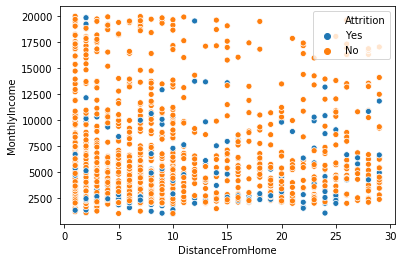

In [28]:
sns.scatterplot(data=df, x='DistanceFromHome', y='MonthlyIncome', hue='Attrition')
plt.show()

Not much can be taken from this, but it seems that lower compensations tend to have more Attrition, which tipically would make sense. Let's develop it further:

In [29]:
# again we shall use chi-square test in order to check for significance between Attrition and DistanceGroup
contingency_table_distance = pd.crosstab(df['DistanceGroup'], df['Attrition'])

# Chi-Square Test
chi2_distance, p_distance, dof_distance, expected_distance = stats.chi2_contingency(contingency_table_distance)

print(f"Chi-Square Statistic for DistanceGroup: {chi2_distance}")
print(f"P-value for DistanceGroup: {p_distance}")

Chi-Square Statistic for DistanceGroup: 7.621635296523076
P-value for DistanceGroup: 0.10646376469344543


In [30]:
# significance between Attrition and CompensationGroup
contingency_table_comp = pd.crosstab(df['CompensationGroup'], df['Attrition'])

# Performing Chi-Square Test
chi2_comp, p_comp, dof_comp, expected_comp = stats.chi2_contingency(contingency_table_comp)

print(f"Chi-Square Statistic for CompensationGroup: {chi2_comp}")
print(f"P-value for CompensationGroup: {p_comp}")

Chi-Square Statistic for CompensationGroup: 72.98711293746298
P-value for CompensationGroup: 9.782402293640052e-16


In [31]:
# checking rates of Attrition for each group
for _ in df.DistanceGroup.unique():
    print(_)
    display(df[df['DistanceGroup'] == _]['Attrition'].value_counts(normalize=True))

Near


No     0.84878
Yes    0.15122
Name: Attrition, dtype: float64

Far


No     0.812245
Yes    0.187755
Name: Attrition, dtype: float64

Moderate


No     0.854237
Yes    0.145763
Name: Attrition, dtype: float64

Very Near


No     0.865337
Yes    0.134663
Name: Attrition, dtype: float64

Very Far


No     0.796296
Yes    0.203704
Name: Attrition, dtype: float64

In [32]:
# checking rates of Attrition for each group
for _ in df.CompensationGroup.unique():
    print(_)
    display(df[df['CompensationGroup'] == _]['Attrition'].value_counts(normalize=True))

Low


No     0.694915
Yes    0.305085
Name: Attrition, dtype: float64

Medium


No     0.867232
Yes    0.132768
Name: Attrition, dtype: float64

High


No     0.892655
Yes    0.107345
Name: Attrition, dtype: float64

Very High


No     0.898305
Yes    0.101695
Name: Attrition, dtype: float64

As noted by the chi-squared test's p-value and rate of Attrition='Yes' for each CompensationGroup, we see that there's a **very significant relationship between Compensation and Attrition**, where Low compensations show a rate of 30% of Attrition! As for distance, it doesn't seem to have a lot of impact in Attrition. So Hypothesis 2 is **PARTIALLY TRUE**.

**3. Job satisfaction is related (same orientation) to job involvement and when both are low, the higher the Attrition**

Now we should analyse the relationship between job satisfaction and job involvement. We do that by checking the correlation:

In [33]:
pd.crosstab(df['JobInvolvement'], df['JobSatisfaction'])

JobSatisfaction,1,2,3,4
JobInvolvement,,,,
1,13,10,28,29
2,73,81,104,107
3,158,159,254,262
4,31,24,41,42


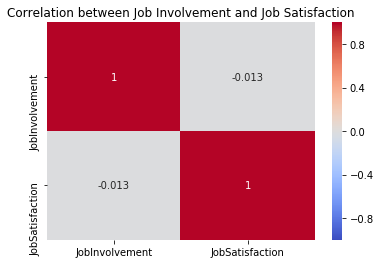

In [34]:
corr_matrix = df[['JobInvolvement', 'JobSatisfaction']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Job Involvement and Job Satisfaction')
plt.show()

From what we can see by both the crosstab and the correlation heatmap, both features are not intimately related. So we need to analyse the impact of each one towards Attrition:

* JobInvolvement:

In [ ]:
fig = px.histogram(df, x='JobInvolvement', color='Attrition', histfunc='sum', 
                   barnorm='percent', nbins=4, text_auto=True,
                   category_orders={'JobInvolvement': ['1', '2', '3', '4']})
fig.update_traces(hovertemplate='Job Involvement: %{x}<br>Weighted Count: %{y}')
fig.update_layout(title='Job Involvement by Attrition', xaxis_title='Job Involvement', yaxis_title='Weighted Count')
fig.show()

<img src="images/fig3.png" alt="fig3" />

In [35]:
contingency_table = pd.crosstab(df['JobInvolvement'], df['Attrition'])

# Chi-Square test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Test Statistic: {chi2}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a statistically significant difference in attrition rates between JobInvolvement")
else:
    print("There is no statistically significant difference in attrition rates between JobInvolvement")

Chi-Square Test Statistic: 24.722546069649113
P-value: 1.7646599376375843e-05
There is a statistically significant difference in attrition rates between JobInvolvement


* JobSatisfaction:

In [ ]:
fig = px.histogram(df, x='JobSatisfaction', color='Attrition', histfunc='sum', 
                   barnorm='percent', nbins=4, text_auto=True,
                   category_orders={'JobSatisfaction': ['1', '2', '3', '4']})
fig.update_traces(hovertemplate='Job Involvement: %{x}<br>Weighted Count: %{y}')
fig.update_layout(title='Job Satisfaction by Attrition', xaxis_title='Job Satisfaction', yaxis_title='Weighted Count')
fig.show()

<img src="images/fig4.png" alt="fig4" />

In [36]:
contingency_table = pd.crosstab(df['JobSatisfaction'], df['Attrition'])

# Chi-Square test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Test Statistic: {chi2}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a statistically significant difference in attrition rates between JobSatisfaction")
else:
    print("There is no statistically significant difference in attrition rates between JobSatisfaction")

Chi-Square Test Statistic: 15.885986380435646
P-value: 0.0011966782844478302
There is a statistically significant difference in attrition rates between JobSatisfaction


We see that both present a significant relationship with Attrition, but we still want to confirm if there's a pattern between them and attrition. One option is to plot a crosstab with the rates for Attrition for each combination (pair) of JobInvolvement and JobSatisfaction values.

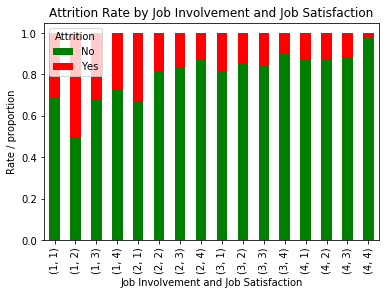

In [37]:
crosstab = pd.crosstab([df['JobInvolvement'], df['JobSatisfaction']], df['Attrition'], normalize='index')
crosstab.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.title('Attrition Rate by Job Involvement and Job Satisfaction')
plt.xlabel('Job Involvement and Job Satisfaction')
plt.ylabel('Rate / proportion')
plt.show()

It is clear that Attrition rates are higher for individuals whose 'Job Involvement' levels were 1 and when 'Job Satisfaction' is 1 together with 'Job Involvement' 2. Overall, we can confirm that **Job Involvement** is the factor that influences the most the Attrition.

For this Hypothesis, we conclude that it's **PARTIALLY TRUE** as well. Even that those two features are not as closely related as one could think, we notice that a low JobInvolvement is significantly related to Attrition.

**4. Employees that accumulate lots of years since last promotion and are from the lowest job levels have higher Attrition**


It makes sense to think that employees that are not gratified with promotions for several years and have lower job levels tend to be less motivated and more inclined to leave the company. First let's analyze the relationship between this feature and Attrition.

In [38]:
crosstab = pd.crosstab(df['YearsSinceLastPromotion'], df['Attrition'])

chi2, p_value, dof, expected = stats.chi2_contingency(crosstab)

print(f"Chi-Square Test Statistic: {chi2}")
print(f"P-value: {p_value}")

Chi-Square Test Statistic: 20.82733094024123
P-value: 0.14243746588971717


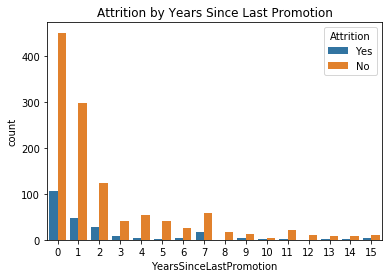

In [39]:
sns.countplot(data=df, x='YearsSinceLastPromotion', hue='Attrition')
plt.title("Attrition by Years Since Last Promotion")
plt.show()

There doesn't seem to be any significant relationship at all between high 'YearsSinceLastPromotion' and Attrition. In fact rates are very similar for every value:

In [40]:
for _ in df.YearsSinceLastPromotion.unique():
    print(_)
    display(df[df['YearsSinceLastPromotion'] == _]['Attrition'].value_counts(normalize=True))

0


No     0.809695
Yes    0.190305
Name: Attrition, dtype: float64

1


No     0.863372
Yes    0.136628
Name: Attrition, dtype: float64

2


No     0.821192
Yes    0.178808
Name: Attrition, dtype: float64

3


No     0.823529
Yes    0.176471
Name: Attrition, dtype: float64

5


No     0.954545
Yes    0.045455
Name: Attrition, dtype: float64

4


No     0.913793
Yes    0.086207
Name: Attrition, dtype: float64

7


No     0.786667
Yes    0.213333
Name: Attrition, dtype: float64

6


No     0.83871
Yes    0.16129
Name: Attrition, dtype: float64

8


No    1.0
Name: Attrition, dtype: float64

10


No     0.833333
Yes    0.166667
Name: Attrition, dtype: float64

9


No     0.8125
Yes    0.1875
Name: Attrition, dtype: float64

11


No     0.913043
Yes    0.086957
Name: Attrition, dtype: float64

12


No    1.0
Name: Attrition, dtype: float64

15


No     0.769231
Yes    0.230769
Name: Attrition, dtype: float64

13


No     0.8
Yes    0.2
Name: Attrition, dtype: float64

14


No     0.888889
Yes    0.111111
Name: Attrition, dtype: float64

Now let's check if there is any sort of relationship between 'YearsSinceLastPromotion' and Attrition when we consider 'JobLevel' as well. To facilitate let's also group up 'YearsSinceLastPromotion' in ranges:

In [41]:
conditions = [
    (df['YearsSinceLastPromotion'] >= 0) & (df['YearsSinceLastPromotion'] <= 3),
    (df['YearsSinceLastPromotion'] >= 4) & (df['YearsSinceLastPromotion'] <= 7),
    (df['YearsSinceLastPromotion'] >= 8) & (df['YearsSinceLastPromotion'] <= 11),
    (df['YearsSinceLastPromotion'] >= 12) & (df['YearsSinceLastPromotion'] <= 15)
]

ranges = ['0-3', '4-7', '8-11', '12-15']
df['YSLPGroup'] = np.select(conditions, ranges, default='15+')

In [42]:
crosstab_job_promo = pd.crosstab([df['JobLevel'], df['YSLPGroup']], df['Attrition'])
chi2, p_value, _, _ = stats.chi2_contingency(crosstab_job_promo)
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p_value}")

Chi-Square Statistic: 78.07145800283662
P-value: 3.988565926785441e-09


Now the chi-square test clearly points out a strong relationship when we consider both features combined! For further analysis, we plot:

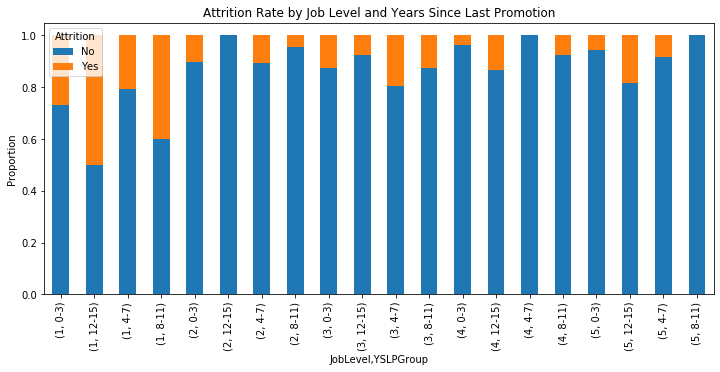

In [43]:
crosstab_job_promo = pd.crosstab([df['JobLevel'], df['YSLPGroup']], df['Attrition'], normalize='index')
crosstab_job_promo.plot(kind='bar', stacked=True, figsize=(12, 5))
plt.title("Attrition Rate by Job Level and Years Since Last Promotion")
plt.ylabel("Proportion")
plt.show()

Now we can clearly observe that Attrition rates are higher when JobLevel is equal to 1 and in the bars where YearsSinceLastPromotion range from 8-11 and 12-15. This makes the Hypothesis **TRUE**.

**5. Education field has little or no relation to Attrition at all**

Similarly, we plot a crosstab and perform a chi-square test:

In [44]:
crosstab_education_attrition = pd.crosstab(df['EducationField'], df['Attrition'])
print(crosstab_education_attrition)

Attrition          No  Yes
EducationField            
Human Resources    19    7
Life Sciences     497   88
Marketing         119   34
Medical           385   57
Other              70   11
Technical Degree   97   32


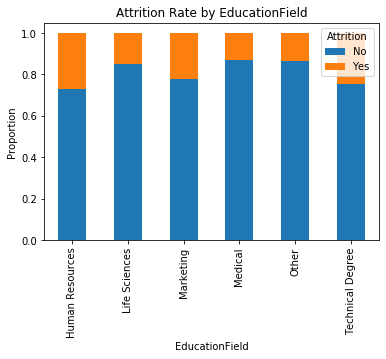

In [45]:
crosstab_education_attrition_norm = pd.crosstab(df['EducationField'], df['Attrition'], normalize='index')
crosstab_education_attrition_norm.plot(kind='bar', stacked=True)
plt.title("Attrition Rate by EducationField")
plt.ylabel("Proportion")
plt.show()

In [46]:
chi2_stat, p_val, dof, ex = stats.chi2_contingency(crosstab_education_attrition)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_val}")

Chi-Square Statistic: 17.89249419919997
P-value: 0.0030842011625653496


Contrary to what the Hypothesis says, Education Field indeed has some significant relationship in relation to Attrition! **Human Resources, Marketing and Techincal Degree** are the backgrounds that show the highest Attrition rates. So the Hypothesis is **FALSE**. 

**6. Poor Work-Life Balance and frequent OverTime increase employee Attrition**

Plotting the countplot and checking the relationship (chi-square) between WorkLifeBalance and Attrition:

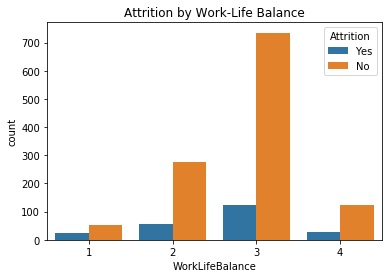

In [47]:
sns.countplot(data=df, x='WorkLifeBalance', hue='Attrition')
plt.title('Attrition by Work-Life Balance')
plt.show()

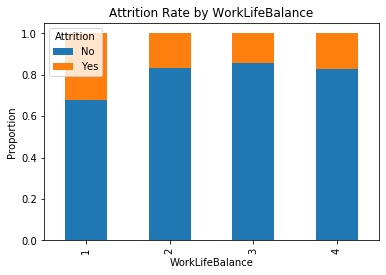

In [48]:
crosstab_wlb_attrition_norm = pd.crosstab(df['WorkLifeBalance'], df['Attrition'], normalize='index')
crosstab_wlb_attrition_norm.plot(kind='bar', stacked=True)
plt.title("Attrition Rate by WorkLifeBalance")
plt.ylabel("Proportion")
plt.show()

In [49]:
crosstab_wlb_attrition = pd.crosstab(df['WorkLifeBalance'], df['Attrition'])
chi2_stat, p_val, dof, ex = stats.chi2_contingency(crosstab_wlb_attrition)

print(f"Chi-Square Statistic for WorkLifeBalance: {chi2_stat}")
print(f"P-value for WorkLifeBalance: {p_val}")

Chi-Square Statistic for WorkLifeBalance: 16.85060840367404
P-value for WorkLifeBalance: 0.0007585400406444005


Plotting and checking the relationship between OverTime and Attrition:

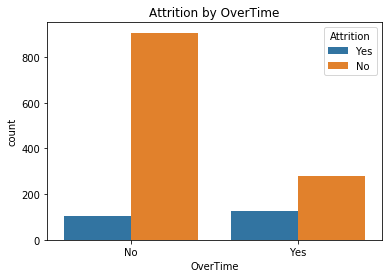

In [50]:
sns.countplot(data=df, x='OverTime', hue='Attrition')
plt.title('Attrition by OverTime')
plt.show()

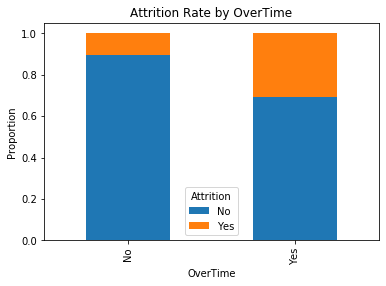

In [51]:
crosstab_ot_attrition_norm = pd.crosstab(df['OverTime'], df['Attrition'], normalize='index')
crosstab_ot_attrition_norm.plot(kind='bar', stacked=True)
plt.title("Attrition Rate by OverTime")
plt.ylabel("Proportion")
plt.show()

In [52]:
crosstab_ot_attrition = pd.crosstab(df['OverTime'], df['Attrition'])
chi2_stat, p_val, dof, ex = stats.chi2_contingency(crosstab_ot_attrition)

print(f"Chi-Square Statistic for OverTime: {chi2_stat}")
print(f"P-value for OverTime: {p_val}")

Chi-Square Statistic for OverTime: 88.80401326788505
P-value for OverTime: 4.359306478857773e-21


Looking at the obtained results it's possible that there might be an important influence of the 'Work-Life Balance' aspect on the Attrition rate, but when it comes to 'Over Time' this relationship is very strong. Let's analyse them both combined just to see the proportions:

In [53]:
crosstab_wlb_ot = pd.crosstab([df['WorkLifeBalance'], df['OverTime']], df['Attrition'])
chi2, p_value, _, _ = stats.chi2_contingency(crosstab_wlb_ot)
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p_value}")

Chi-Square Statistic: 108.3626889213076
P-value: 2.0068481142934058e-20


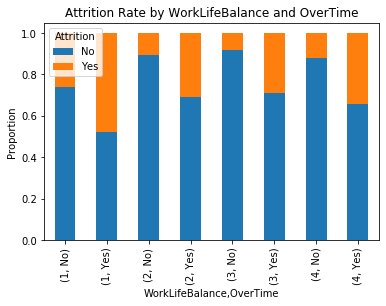

In [54]:
crosstab_wlb_ot_normalized = pd.crosstab([df['WorkLifeBalance'], df['OverTime']], df['Attrition'], normalize='index')
crosstab_wlb_ot_normalized.plot(kind='bar', stacked=True)
plt.title("Attrition Rate by WorkLifeBalance and OverTime")
plt.ylabel("Proportion")
plt.show()

It's very clear that Over Time is a major factor when it comes to Attrition, and the rates are slightly higher when Work-Life Balance is low. It makes sense to think that Over Time may even directly influence a lower Work-Life Balance grade. This Hypothesis is **TRUE**.

### Insights Obtained

Overall from what we could notice, we can assemble some **actionable insights** in the form of **recommendations** to the HR department, regarding each of the raised Hypothesis:

**1.The higher the 'Age', the more propension of Attrition due to retirement or because companies seek to refresh their workforce with younger individuals (FALSE):**
- The group with highest attrition is the younger one, so this means there should be reasons as why these employees are leaving.
- It's suggested that the company focus on retaining younger employees, possibly by addressing their needs for career development, competitive compensation, and implement a deeper study on their work-life balance.
- Mentorship programs are also good alternatives to engage younger employees and help them feel more connected to the organization.

**2.The furthest employees with lower compensations are located from work, the more likely they are to leave the company (PARTIALLY TRUE):**
- Lower compensation is the major factor here that may be related to attrition, while distance have little to no impact.
- Consider improving compensation packages, especially for lower-paid employees.
- Conduct a survey on the employees' thoughts on commuting distance and their overall job involvement. Maybe offer transportation benefits or remote work options to mitigate any potential dissatisfaction due to commuting distance.

**3.Job satisfaction is related (same orientation) to job involvement and when both are low, the higher the Attrition (PARTIALLY TRUE):**
- While job satisfaction and job involvement are not significantly related, low job involvement is associated with higher attrition.
- Regularly measure job involvement and enhance it by understanding what makes their work more engaging.
- Implement a more rewarding and more positive culture regarding employees' contributions and their recognition.
- Look for more opportunities for growth and development.

**4.Employees that accumulate lots of years since last promotion and are from the lowest job levels have higher Attrition (TRUE):**
- Attrition rates are indeed higher for employees at Job Level 1 who haven't been promoted for 8-15 years.
- Consider offering more opportunities for promotions, skill development, and role enhancements to reduce stagnation.
- Develop clear career progression paths for employees, especially those at lower job levels, and collect their inputs and expectations on the matter.

**5.Education field has little or no relation to Attrition at all (FALSE):**
- Although not very strong, Human Resources, Marketing, and Technical Degree backgrounds show some relationship with Attrition.
- Further analyse which departments have a majority of employees with those backgrounds, and if there is a pattern.
- Tailor retention strategies and development programs for employees based on their educational backgrounds. For example provide up-to-date specialization courses and carrer path opportunities for those professionals.

**6.Poor Work-Life Balance and frequent OverTime increase employee Attrition (TRUE):**
- Overtime is a major factor contributing to higher attrition, and poor work-life balance also correlates with slightly higher attrition rates.
- Implement policies that promote a better work-life balance, such as flexible working hours, work-from-home options, and limiting overtime
- Regularly monitor and adjust workloads to prevent burnout and ensure employees have a healthy balance between work and personal life. Identify if there is a pattern regaring specific departments and/or managers with more employees working overtime in order to reduce it.
- Consider improving the office's infrastructure, environmental and well-being factors such as snacks, drinks, good internet connection, leisure spots...

# Feature Engineering<a class="anchor" id="fifth-bullet"></a>
Now our next goal is to classify the employees into clusters, in order to check for major differences and patterns between them, which will help the HR dept. have new ideas and insights to tackle specific employee groups, together with our previous suggestions.

Now aiming to select and train a clustering ML model, we must first prepare our data and choose which columns/features to include in the model training.

### Feature Selection

We can discard some variables that are colinear, or in other words, express the same information and would add complexity and redundancy to the model.

In [55]:
# create a copy of the dataset if needed
df_eda = df.copy()

In [56]:
# for compensation, we are going to choose MonthlyIncome as our main feature
# discard 'DailyRate', 'HourlyRate', 'MonthlyRate', 'AgeGroup', 'DistanceGroup', 'CompensationGroup', 'YSLPGroup'
df.head()
df.drop(['DailyRate', 'HourlyRate', 'MonthlyRate', 'AgeGroup', 'DistanceGroup', 'CompensationGroup', 'YSLPGroup'], axis=1, inplace=True)

In [57]:
# drop our target, which is what we want to analyse after cluster formation
df.drop(['Attrition'], axis=1, inplace=True)

Applying a heatmap to the correlation table for all columns, we can analyse which features are possibly colinear (do not contribute to the model training and might affect performance and results):

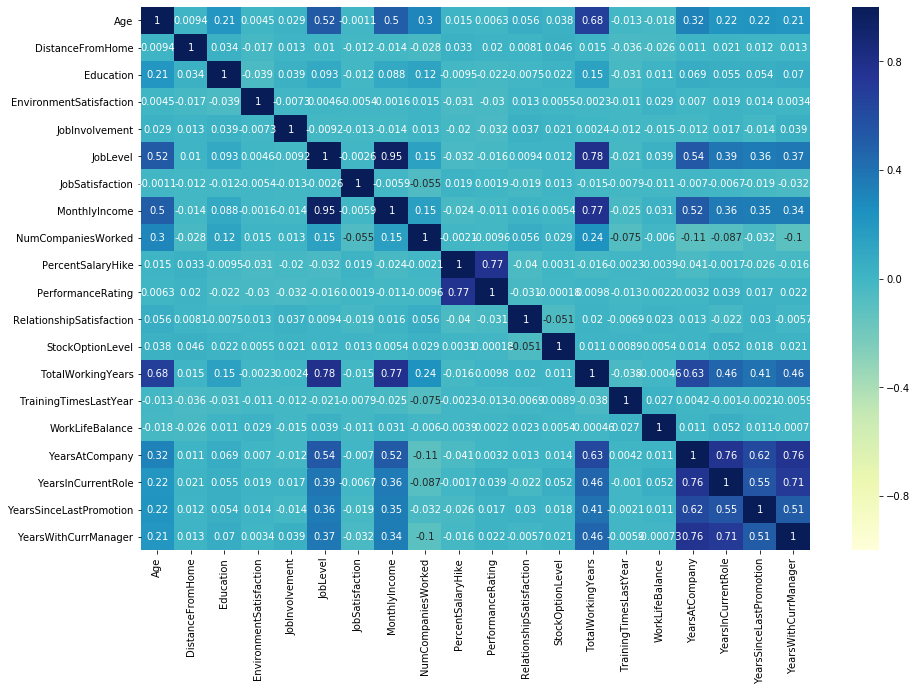

In [58]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", ax=ax);

According to convention, when two features have correlation next to 0.8 they can already be considered highly correlated, and thus one of them can be removed from the dataset. In our case, we will drop **'TotalWorkingYears'**, because it seems to be highly correlated with JobLevel and MonthlyIncome (it makes sense as a natural progression in a typical career). We also drop **'YearsAtCompany'** due to its high correlation to other 'Year' columns. Another relationship that is almost fully dependent is the one between JobLevel and MonthlyIncome. In this case I chose to drop **'JobLevel'** because MonthlyIncome is more granular and can capture nuances that JobLevel might miss.

In [59]:
df.drop(['TotalWorkingYears', 'YearsAtCompany', 'JobLevel'], axis=1, inplace=True)

### Encoding

In order to include the categorical columns into our analysis, they must be turned into numeric columns. This is done by using an one-hot encoding technique. This time we'll use get_dummies() method due to it's simplicity.

In [60]:
# getting non-numeric columns
non_numeric_columns = df.select_dtypes(exclude='number').columns
for _ in non_numeric_columns:
    print(f'{_}->\n{df[_].unique()}\n')

BusinessTravel->
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel' 'TravelRarely']

Department->
['Research & Development' 'Sales' 'Human Resources']

EducationField->
['Life Sciences' 'Medical' 'Marketing' 'Technical Degree' 'Other'
 'Human Resources']

Gender->
['Male' 'Female']

JobRole->
['Laboratory Technician' 'Sales Representative' 'Research Scientist'
 'Human Resources' 'Manufacturing Director' 'Sales Executive'
 'Healthcare Representative' 'Research Director' 'Manager']

MaritalStatus->
['Single' 'Divorced' 'Married']

SalarySlab->
['Upto 5k' '5k-10k' '10k-15k' '15k+']

OverTime->
['No' 'Yes']



In [61]:
df_encoded = pd.get_dummies(df, columns=non_numeric_columns, drop_first=True)
df_encoded.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_TravelRarely,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,SalarySlab_15k+,SalarySlab_5k-10k,SalarySlab_Upto 5k,OverTime_Yes
0,18,3,3,3,3,3,1420,1,13,3,3,0,2,3,0,0,0.0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,18,10,3,4,2,3,1200,1,12,3,1,0,2,3,0,0,0.0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
2,18,5,3,2,3,2,1878,1,14,3,4,0,3,3,0,0,0.0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1
3,18,5,2,2,3,4,1051,1,15,3,4,0,2,3,0,0,0.0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,18,8,1,3,3,3,1904,1,12,3,4,0,0,3,0,0,0.0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0


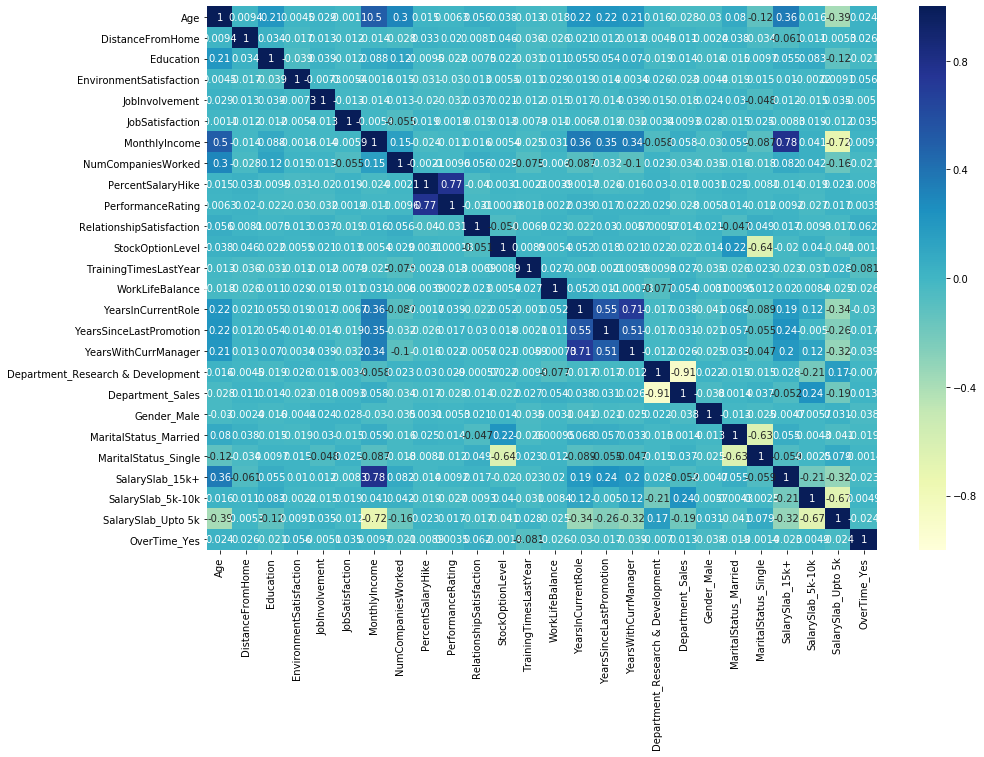

In [62]:
# I'd run a heatmap for correlation again here, but since a lot of new columns were added, it would become cluttered and hard to analyse.
# Because of such, I decided to include only a few categorical columns here on this second run of the heatmap

df_encoded_alt = pd.get_dummies(df, columns=['Department','Gender','MaritalStatus','SalarySlab','OverTime'], drop_first=True)

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_encoded_alt.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", ax=ax);

In [63]:
# After dropping a few more extra columns, we are ready to move on
df_encoded.drop(['SalarySlab_15k+', 'PerformanceRating'], axis=1, inplace=True)

In [64]:
# we have at the moment 40 columns
len(df_encoded.columns)

40

### Variance Thresholding

Another very common tecnique for feature selection involves checking the variance. Features with low variance might not contribute much to the model training. For this we use the *VarianceThreshold* method from sklearn.

In [65]:
# save a copy
df_feature = df_encoded.copy()

In [66]:
from sklearn.feature_selection import VarianceThreshold

# Define threshold. The best value for this is generally determined by trial and error.
threshold = 0.85 # this removes columns whose values are 15% or more similar.

selector = VarianceThreshold(threshold)
df_high_variance = selector.fit_transform(df_encoded)

# Get the indices of the kept features
kept_features = selector.get_support(indices=True)
print(df_encoded.iloc[:, kept_features].columns)

# Create a DataFrame with the remaining features
df_high_variance = df_encoded.iloc[:, kept_features]

# this shows the columns that have been removed
#df_encoded.columns[~selector.get_support()]

Index(['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'RelationshipSatisfaction',
       'TrainingTimesLastYear', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


### Feature Importance

At last, another useful method for selecting features is by determining the score of feature importance. This can be done by implementing a tree-based model exclusively for this purpose, for example a *Random Forest Classifier*. It specializes into determining the best features that separate the dataset.

This can be done by instantiating the method from sklearn.ensemble and then invoking the attribute 'feature_importances_'.

In [67]:
# The RF model needs a target 'y', which is the Attrition column
y = df_eda['Attrition']

In [68]:
from sklearn.ensemble import RandomForestClassifier

# Fit a random forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(df_encoded, y) # using default 100 trees

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for easy visualization
feature_importances = pd.DataFrame({'Feature': df_encoded.columns, 'Importance': importances})

# Sort by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
feature_importances

,Feature,Importance
6,MonthlyIncome,0.108535
0,Age,0.081827
1,DistanceFromHome,0.061594
39,OverTime_Yes,0.057394
15,YearsWithCurrManager,0.050052
8,PercentSalaryHike,0.047038
7,NumCompaniesWorked,0.043056
13,YearsInCurrentRole,0.041463
3,EnvironmentSatisfaction,0.037804
14,YearsSinceLastPromotion,0.035669


In [69]:
# Looking at the table above, we should try selecting features that have an importance level higher than the threshold.
# A value of 0.05 was chosen after first testing with 0.01 and 0.03, because it yielded better results in the clustering algorithm

# Set a threshold for feature importance
threshold = 0.05

# Keep only the features above the threshold
important_features = feature_importances[feature_importances['Importance'] > threshold]['Feature']

# Subset the original DataFrame to keep only important features
df_importance = df_encoded[important_features]

With the dataframes resulting from both variance and feature importance analysis at hand, we get the common columns:

In [70]:
df_high_variance.columns

Index(['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'RelationshipSatisfaction',
       'TrainingTimesLastYear', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [71]:
df_importance.columns

Index(['MonthlyIncome', 'Age', 'DistanceFromHome', 'OverTime_Yes',
       'YearsWithCurrManager'],
      dtype='object')

Now we have two options: either proceed with the modeling for each dataframe, or create another one with all their columns combined.
They'll be run separately due to their difference in the number of columns, so we can observe what happens to each of them.

In [72]:
#columns_high_variance = set(df_high_variance.columns)
#columns_importance = set(df_importance.columns)

#combined_columns = list(columns_high_variance.union(columns_importance))

In [73]:
#df_combined = df_encoded[combined_columns]

### Scaling

Scaling is a very important step before our modeling because it makes all numeric data be at the same scale. This is especially true when talking about clustering algorithms because it allows the model to take all features into consideration the same way when calculating distances, instead of prioritizing a few features that may have greater range than others.

In [74]:
# initialize Scaler
scaler = MinMaxScaler()
df_scaled_hv = pd.DataFrame(scaler.fit_transform(df_high_variance), columns=df_high_variance.columns)
df_scaled_imp = pd.DataFrame(scaler.fit_transform(df_importance), columns=df_importance.columns)

df_scaled_imp.head()

,MonthlyIncome,Age,DistanceFromHome,OverTime_Yes,YearsWithCurrManager
0,0.021643,0.0,0.071429,0.0,0.0
1,0.010058,0.0,0.321429,0.0,0.0
2,0.045761,0.0,0.142857,1.0,0.0
3,0.002212,0.0,0.142857,0.0,0.0
4,0.047130,0.0,0.250000,0.0,0.0


In [75]:
# save a copy
df_ml_hv = df_scaled_hv.copy()
df_ml_imp = df_scaled_imp.copy()

# Choosing ML models<a class="anchor" id="sixth-bullet"></a>
In this step we have a few choices of clustering models to choose from. We shall test with two of the most commonly used models:
- K-Means
- DBScan

### K-Means
K-Means is an algorithm that works like the following: it creates K centroids in the N-dimensional plane, and calculates the distances between every point of the dataset and the centroids. The ones closest to the centroids are assigned the same cluster label. Then, the centroids are repositioned at the center of those points of the same label, and again the distances are calculated. This process of creating new clusters and labeling points repeats many times until the end of the process.

In order to implement it we must inform the number of clusters (K) we would like to split our data into. In order not to just guess a value for K, there's a test called Elbow Method, in which we run the algorithm with various values of K and check a metric called inertia, which indicates cluster formation stability. When the inertia starts to stabilize, we check the respective K value and that indicates a good cluster number parameter.

In [76]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [77]:
# We will test from 2 to 15 clusters
inertia_hv = []
inertia_imp = []
range_clusters = range(2, 16)

# high variance dataset
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42) # random_state serves to freeze the memory variables aiming reproducibility
    kmeans.fit(df_scaled_hv)
    inertia_hv.append(kmeans.inertia_)
    
# high importance dataset
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42) # random_state serves to freeze the memory variables aiming reproducibility
    kmeans.fit(df_scaled_imp)
    inertia_imp.append(kmeans.inertia_)

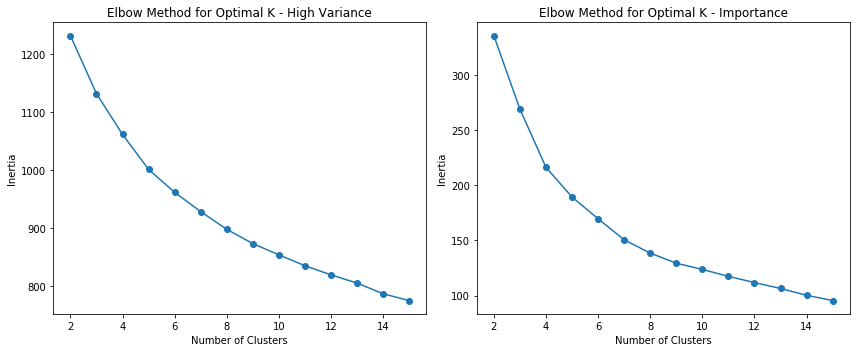

In [78]:
# Plotting the Elbow graph, we must check where the inertia starts to decreasce more slowly, indicating cluster formation stability

fig, axs = plt.subplots(1, 2, figsize=(12,5))

axs[0].plot(range_clusters, inertia_hv, marker='o')
axs[0].set_title('Elbow Method for Optimal K - High Variance')
axs[0].set_xlabel('Number of Clusters')
axs[0].set_ylabel('Inertia')
    
axs[1].plot(range_clusters, inertia_imp, marker='o')
axs[1].set_title('Elbow Method for Optimal K - Importance')
axs[1].set_xlabel('Number of Clusters')
axs[1].set_ylabel('Inertia')

plt.tight_layout()
plt.show()

For the high variance dataset it's noticed a slightly slower decreasce of inertia around K=5, although not very apparent. But for the importance dataset we can clearly observe an aparent bent at K=5. Let's perform a few more steps to determine the ideal number of clusters.

Another useful metric to check is the Silhouette Score. It measures how similar an object is to its own cluster compared to other clusters. A higher silhouette score indicates better clustering (well-defined boundaries).

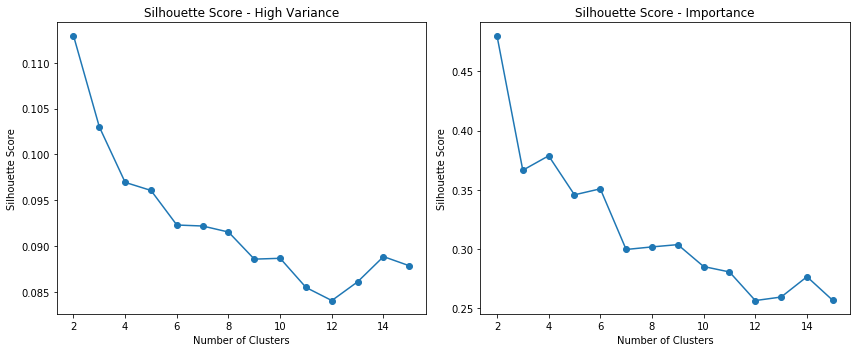

In [79]:
# testing silhouette scores for different values
silhouette_scores_hv = []
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled_hv)
    score = silhouette_score(df_scaled_hv, kmeans.labels_)
    silhouette_scores_hv.append(score)
    
silhouette_scores_imp = []
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled_imp)
    score = silhouette_score(df_scaled_imp, kmeans.labels_)
    silhouette_scores_imp.append(score)

fig, axs = plt.subplots(1, 2, figsize=(12,5))

axs[0].plot(range_clusters, silhouette_scores_hv, marker='o')
axs[0].set_title('Silhouette Score - High Variance')
axs[0].set_xlabel('Number of Clusters')
axs[0].set_ylabel('Silhouette Score')
    
axs[1].plot(range_clusters, silhouette_scores_imp, marker='o')
axs[1].set_title('Silhouette Score - Importance')
axs[1].set_xlabel('Number of Clusters')
axs[1].set_ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

If a silhouette score is close to 1, that means a better cluster formation. The scores obtained with the first dataset are not very good, but the dataset made with the feature selection considering the **importance was the one with better results**, so it shall be the only one to be tested from now on. We could go with K=2, which would yield the best silhouette score.

Before making any conclusions, a good practice is to visualize cluster formation for different K values. For this, we can apply a technique called PCA (Principal Component Analysis), which reduces the dimensionality of our dataset while preserving the variance. Examples for 2 dimensions:

In [80]:
df_scaled = df_scaled_imp.copy()

Number of clusters: 2


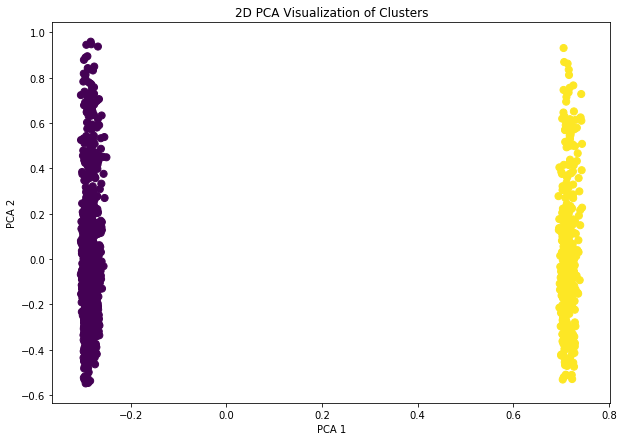

Number of clusters: 3


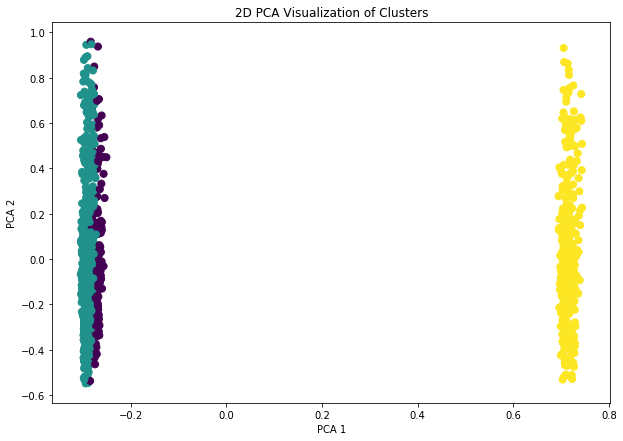

Number of clusters: 4


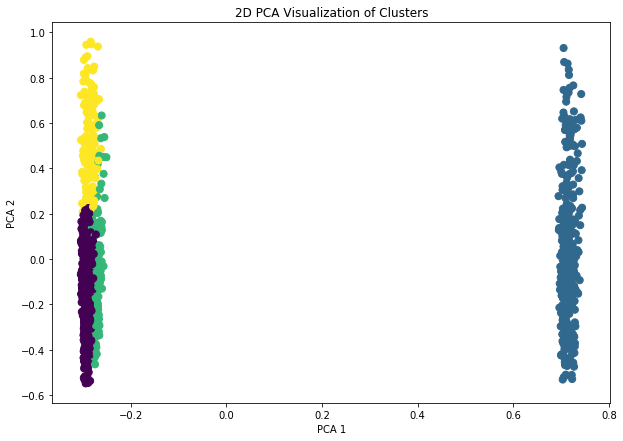

In [81]:
from sklearn.decomposition import PCA

range_clusters = range(2,5)
for k in range_clusters:
    print(f'Number of clusters: {k}')
    
    # applying K-Means
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(df_scaled)

    # Perform PCA to reduce the data to 2 dimensions
    pca = PCA(n_components=2)
    df_pca = pca.fit_transform(df_scaled)

    # Plot the PCA-reduced data with cluster assignments
    plt.figure(figsize=(10, 7))
    plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
    plt.title('2D PCA Visualization of Clusters')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.show()

Considering the cluster formation, when K=2 there are undoubtedly two well-defined clusters. K=3 also seems reasonable, although there would be two clusters very close to each other. Next we'll try another algorithm:

### DBScan
DBSCAN is another clustering algorithm that groups together points that are closely packed together and marks points that are in low-density regions as outliers. DBSCAN has two main parameters: **eps**, which is the maximum distance between two points to be considered in the same neighborhood, and **min_samples**, which is the minimum number of points required to form a cluster.

In [82]:
from sklearn.cluster import DBSCAN

# Testing for eps range between 0.1 and 0.4, stepping every 0.05:
eps_range = np.arange(0.1, 0.5, 0.05)
# Testing for min_sample between 5 and 55, stepping every 10:
min_samples_range = np.arange(5, 56, 10)

# Lists to store results
results = []

for min_sample in min_samples_range:
    for eps in eps_range:
        # Initialize DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_sample)

        # Fit DBSCAN to your scaled data
        dbscan.fit(df_scaled)

        # The cluster labels assigned by DBSCAN
        labels = dbscan.labels_

        # Number of clusters in labels (ignoring noise if present)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        
        # Append results to the list
        results.append({
            'min_sample': min_sample,
            'eps': eps,
            'n_clusters': n_clusters,
            'n_noise': n_noise
        })

# Create a DataFrame from the results
df_results = pd.DataFrame(results)

In [83]:
df_results

,min_sample,eps,n_clusters,n_noise
0,5,0.10,21,759
1,5,0.15,10,292
2,5,0.20,5,136
3,5,0.25,3,40
4,5,0.30,2,8
5,5,0.35,2,3
6,5,0.40,2,2
7,5,0.45,2,0
8,15,0.10,3,1212
9,15,0.15,5,670


In our scenario the eps is very senstive, which means the data is very grouped/dense. We should look for a scenario with a good amount of cluters and a moderate noise. If we take min_sample=55 and an eps of 0.45 for example, that gives us 2 well-defined clusters. Let's visualize them:

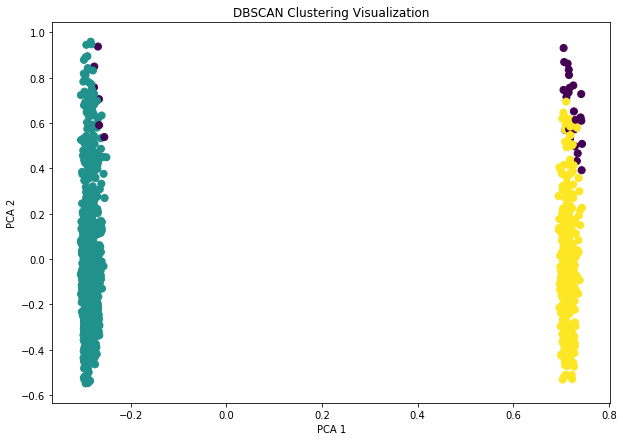

In [84]:
# Initialize DBSCAN
dbscan = DBSCAN(eps=0.45, min_samples=55)

# Fit DBSCAN to your scaled data
dbscan.fit(df_scaled)

# The cluster labels assigned by DBSCAN
labels = dbscan.labels_

# Perform PCA to reduce the data to 2 dimensions - already done but good practice to remember
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Plotting the clusters
plt.figure(figsize=(10, 7))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering Visualization')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [85]:
# Calculating the silhouette score
sil_score = silhouette_score(df_scaled, labels)
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.4478192401116123


Given the results, both methods indicate that two clusters is the ideal scenario. Given the business problem at hand, we could also choose K=3 if the HR department wishes to have more than two groups to be analyzed. We choose to go with 3 clusters for now.

### Comparing other Scaling methods
Scaling can significantly affect clustering algorithms. Aside from MinMaxScaler, there are other two commonly used scaling methods: StandardScaler and RobustScaler. In order to see if there are big changes to our first found results, we create a pipeline in order to test each dataframe with different scalings with varying parameters from both algorithms:

In [86]:
# Initialize each scaler

scaler = MinMaxScaler()
df_mm = pd.DataFrame(scaler.fit_transform(df_importance), columns=df_importance.columns)

scaler = StandardScaler()
df_ss = pd.DataFrame(scaler.fit_transform(df_importance), columns=df_importance.columns)

scaler = RobustScaler()
df_rs = pd.DataFrame(scaler.fit_transform(df_importance), columns=df_importance.columns)

In [87]:
# Dataframe list
df_dict = {'MinMaxScaler': df_mm, 'StandardScaler': df_ss, 'RobustScaler': df_rs}

In [88]:
def apply_kmeans(df, range_clusters):
    silhouette_scores = []
    for k in range_clusters:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(df)
        score = silhouette_score(df, kmeans.labels_)
        
        silhouette_scores.append({
            'k': k,
            'sil_score': score
        })
        
    return pd.DataFrame(silhouette_scores)

In [89]:
def apply_dbscan(df, eps_range, min_samples_range):
    silhouette_scores = []
    for min_sample in min_samples_range:
        min_sample = round(min_sample, 2)
        for eps in eps_range:
            eps = round(eps, 2)
            dbscan = DBSCAN(eps=eps, min_samples=min_sample)
            dbscan.fit(df)
            
            labels = dbscan.labels_
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            n_noise = list(labels).count(-1)
            
            if len(set(labels)) > 1:  # Silhouette score is not defined for 1 cluster
                score = silhouette_score(df, labels)
            else:
                score = 0
                
            silhouette_scores.append({
                'min_sample': min_sample,
                'eps': eps,
                'sil_score': score
            })
                
    df_scores = pd.DataFrame(silhouette_scores)
    pivot_df = df_scores.pivot(index='eps', columns='min_sample', values='sil_score')
    
    # Plotting the pivot table
    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_df, annot=True, cmap='viridis', fmt=".3f")
    plt.title('Silhouette Score Heatmap')
    plt.xlabel('min_sample')
    plt.ylabel('eps')
    plt.show()
    
    return df_scores

Testing MinMaxScaler:


,k,sil_score
0,2,0.480134
1,3,0.366526
2,4,0.378701


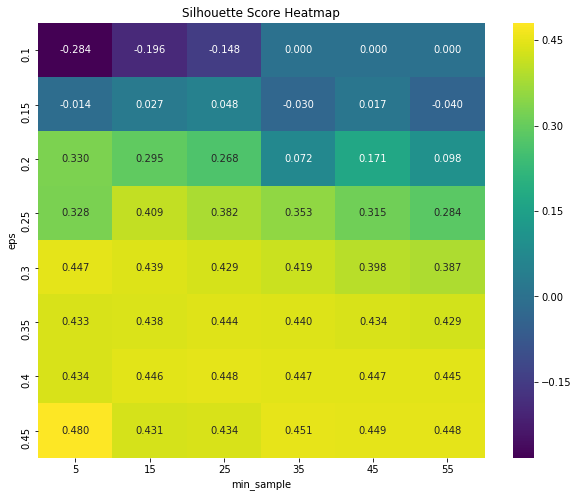

Testing StandardScaler:


,k,sil_score
0,2,0.263922
1,3,0.283693
2,4,0.284055


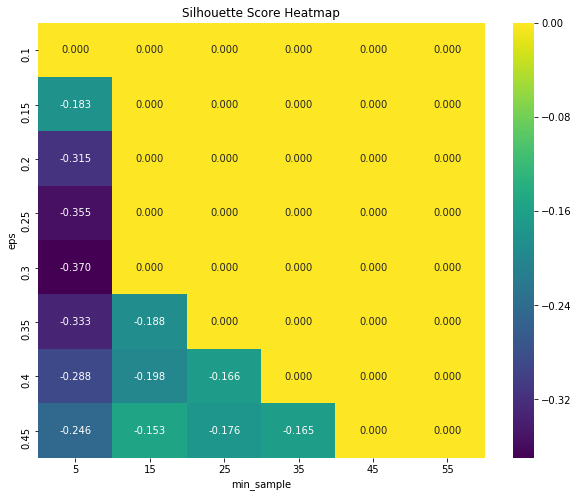

Testing RobustScaler:


,k,sil_score
0,2,0.349683
1,3,0.260509
2,4,0.249667


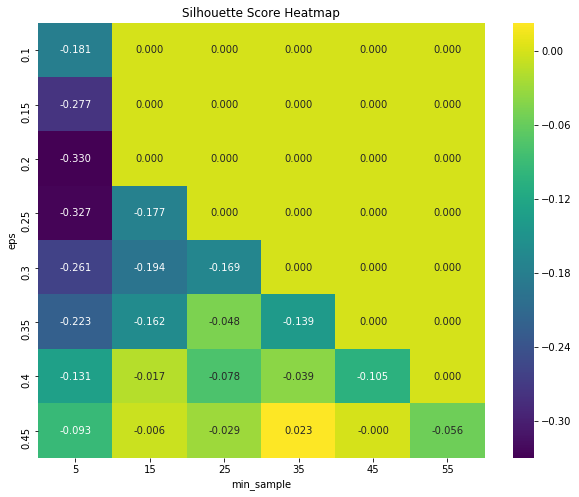

In [90]:
# Pipeline for testing clustering algorithms

for scaler, df in df_dict.items():
    print('='*100)
    print(f'Testing {scaler}:')
    
    # Using the same ranges from the previous tests:
    kmeans_range = range(2, 5)
    df_kmeans = apply_kmeans(df, kmeans_range)
    display(df_kmeans)
    
    eps_range = np.arange(0.1, 0.5, 0.05)
    min_samples_range = np.arange(5, 56, 10)
    df_dbscan = apply_dbscan(df, eps_range, min_samples_range)

From our tests it's clear that the MinMaxScaler was the transformation with better results. Now let's apply the final results into our dataset:

In [91]:
# load previously saved dataset, before transformations
df = df_eda.copy()

# applying K-Means with the final parameters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)
df['GroupLabel'] = kmeans_labels

In [92]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeGroup,DistanceGroup,CompensationGroup,YSLPGroup,GroupLabel
0,18,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,3,Male,54,3,1,Laboratory Technician,3,Single,1420,Upto 5k,25233,1,No,13,3,3,0,0,2,3,0,0,0,0.0,18-29,Near,Low,0-3,1
1,18,No,Travel_Rarely,812,Sales,10,3,Medical,4,Female,69,2,1,Sales Representative,3,Single,1200,Upto 5k,9724,1,No,12,3,1,0,0,2,3,0,0,0,0.0,18-29,Far,Low,0-3,1
2,18,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,2,Male,69,3,1,Sales Representative,2,Single,1878,Upto 5k,8059,1,Yes,14,3,4,0,0,3,3,0,0,0,0.0,18-29,Near,Low,0-3,2
3,18,No,Non-Travel,287,Research & Development,5,2,Life Sciences,2,Male,73,3,1,Research Scientist,4,Single,1051,Upto 5k,13493,1,No,15,3,4,0,0,2,3,0,0,0,0.0,18-29,Near,Low,0-3,1
4,18,Yes,Non-Travel,247,Research & Development,8,1,Medical,3,Male,80,3,1,Laboratory Technician,3,Single,1904,Upto 5k,13556,1,No,12,3,4,0,0,0,3,0,0,0,0.0,18-29,Moderate,Low,0-3,1


# Results Analysis<a class="anchor" id="ninth-bullet"></a>

Now we should analyze the newly obtained cluster labels, in order to determine **which characteristics they have in common**. This will help the HR Department to implement more precise initiatives and strategies to each group.

Instead of performing this exploration here, we will load the dataset with the clusters labels into a **PowerBI Report**, which will be the final deliverable product to the HR team, along with the insights and their recommendations.

In [93]:
# saving the dataset to a .csv, to be loaded into PowerBI
df.to_csv(filepath+'\HR_Analytics_Final.csv', index = False, encoding='utf-8')

Link to the PowerBI Report:
[PowerBI Report](https://app.powerbi.com/groups/9589d4f1-2310-40a5-bce6-a9536ee6967c/reports/4ca4c50d-04b3-47af-b8aa-86c7e9bd37eb/ReportSection?ctid=85b28421-d45a-4b07-889d-24b528c7f250&experience=power-bi)

*(if the link doesn't work due to corporative sharing restrictions, I've included some prints of the most important parts below)*

## Understanding the PowerBI Report
For this report, I've creted an Overview tab, with general analysis and comparisons of all three groups, and general but very useful observations.

Then I created one tab for each group, containing the same views/charts as a way to understand and compare the particularities of each one in more detail:

<img src="images/Overview1.png" alt="Overview1" />

<img src="images/Overview2.png" alt="Overview2" />

Regarding the Overview tab, the most useful insights we can take from it is that **Overtime is an exclusive feature from Group1**, and they should be receive more attention on this matter.

Group 0 is the one with more members, and they all share the same average age, job level and income (which means those features were not the most representative ones to differentiate the clusters).

Another difference between them is the Average Distance From Home, although this by itself does not say anything about the Attrition.

I've added a descriptive box with some text when the icon next to the leftmost graphs are clicked, in which I included observations about the compensation within Group1 (the one with Overtime): those with smaller compensations show **significantly higher Attrition Rates!**

<img src="images/Group0.png" alt="Group0" />

<img src="images/Group1.png" alt="Group1" />

<img src="images/Group2.png" alt="Group2" />

Regarding the Group-speficic tabs, aside from understanding the demographics from each group, it's expected from the HR Team to try pointing out **which employees show lower levels of satisfaction, involvement and work-life balance**. For example, women between 35-38 years old from Group0 show lower levels of 'Relationship Satisfaction', in comparison to all the other averages. This may be worth investigating in more depth within the company routine.


The 'Department' filter on the top of the page might be a useful tool in order to refine this kind of analysis.

Another very noticeable insight is that the Attrition Rate is higher for Lower compensations, in all Groups.

## Conclusions

In this project, we were given the challenge to better understand the factors influencing attrition, based on employee data. The main objective was to initially explore the data, uncovering patters, implement a clustering strategy if applicable, and develop actionable insights in order to reduce the turnover.

The main challenged that were faced included: ensuring the data was clean, understanding and selecting the most relevant features, and intepreting the results and their relation to Attrition to drive meaningful conclusions. The Exploratory Data Analysis step presented itself as crucial in indentifying correlations between factors like age, income and work-life balance, and how they might affect turnover, which are real and challenging factors to be overcome in corporative worlds.

Paired with the initial hypothesis, several key insights were discovered through our analysis, which proved themselves statistically relevant and could potentially proedict or explain the attrition. Additionally, a clustering algorithm was succesfully implemented in order to group up the employees with similar attributes, allowing us to understand and target specific groups with tailored initiatives.

PowerBI is always an excellent tool for visualizing the data and presenting insights to stakeholders, making it easier to communicate the results clearly to the company’s leadership. It's versatility allows for building dashboards at various formats, with dynamic filtering, slicers and even distributing it by e-mail or in slideshow presentation format.

Finally, let's recap our recommendations to the HR Department, based on the findings:

- Provide mentorship programs and other engagement-focused activities to increase younger employees' connection to the company, as well as clear career progression paths and opportunities for promotions


- Closely monitor satisfaction levels related to the 'distance to work' metrics


- Consider implementing retention initiatives or improving compensation packages for employees with low compensations


- Regularly measure job involvement and improve factors such as recognition, growth and development in order to keep it ah high levels


- Provide custom specialization courses based on the employees' educational backgrounds, and give them opportunities to interact and familiarize with other areas and how each contribute to the big picture


- Alleviate overtime whenever possible, considering it's the main factor impacting the Attrition rates. Flexible working hours, hybrid work regime and providing more quality of life and comfort in the office are good measures in order to mitigate overtime impact


- And last but not least, collect feedback from the employees! Applying interactive surveys or games are also fun ways to especially target younger audiences and engage them in sharing their sentiment and ideas for the company.

Final observations:

Thinking ahead, possible improvements on this project might include predictive modeling for attrition, especially for new employees, improving feature selection (having a feedback from employees in the future could potentially be one of the main factors to measure insatisfaction), and even integrating real-time analytics to monitor employee sentiment. This would further refine the insights and allow for proactive HR strategies.

---

[Back to the top](#top-bullet)